TS_FinanceSectorMoveFromLondonToDublin_Data - Notebook

Quality of life index and ratio data gathering (report A.)

In [2]:
#import libraries
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup

#import data from website
source = requests.get('https://www.numbeo.com/quality-of-life/compare_cities.jsp?country1=United+Kingdom&country2=Ireland&city1=London&city2=Dublin').text
soup = BeautifulSoup(source, 'html5lib')

#get the needed part of html
numbeo_table_soup = soup.find(class_ = 'visualizeComparison')

#save headings
heading_1 = numbeo_table_soup.find('th',class_="smallspace_before_right_column").text
heading_2 = numbeo_table_soup.find('th',class_="border_to_separate_from_left_column").text

#get the data from website
data = []
rows = numbeo_table_soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

#get the data in to a dataframe
df = pd.DataFrame({'column':data})
df['column'] = df['column'].astype('str')
life_quality_df = df['column'].str.split(",", n = 4, expand = True) 

#drop not needed rows
life_quality_df=life_quality_df.drop(df.index[0])
life_quality_df=life_quality_df.drop(df.index[9])
life_quality_df=life_quality_df.drop(df.index[11])
life_quality_df=life_quality_df.drop(df.index[12])
life_quality_df=life_quality_df.drop(df.index[13])
life_quality_df=life_quality_df.drop(df.index[14])

#renaming column headers to match the desired format
life_quality_df.rename(columns = {0:'Index/Ratio', 1: 'LondonWordResult', 2: 'LondonNumberResult', 3: 'DublinWordResult', 4: 'DublinNumberResult'}, inplace=True)

#drop the unnecessary signs
life_quality_df['Index/Ratio'] = life_quality_df['Index/Ratio'].str.replace('[', '')
life_quality_df['Index/Ratio'] = life_quality_df['Index/Ratio'].str.replace('\'', '')
life_quality_df['LondonWordResult'] = life_quality_df['LondonWordResult'].str.replace('\'', '')
life_quality_df['LondonNumberResult'] = life_quality_df['LondonNumberResult'].str.replace('\'', '')
life_quality_df['DublinWordResult'] = life_quality_df['DublinWordResult'].str.replace('\'', '')
life_quality_df['DublinNumberResult'] = life_quality_df['DublinNumberResult'].str.replace(']', '')
life_quality_df['DublinNumberResult'] = life_quality_df['DublinNumberResult'].str.replace('\'', '')

#change LondonNumberResult and DublinNumberResult to float data type
life_quality_df['LondonNumberResult'] = life_quality_df['LondonNumberResult'].apply(pd.to_numeric, errors='coerce')
life_quality_df['DublinNumberResult'] = life_quality_df['DublinNumberResult'].apply(pd.to_numeric, errors='coerce')

life_quality_df=life_quality_df.set_index('Index/Ratio')

print(life_quality_df)

                               LondonWordResult  LondonNumberResult  \
Index/Ratio                                                           
Purchasing Power Index                 Moderate               91.02   
Safety Index                           Moderate               48.08   
Health Care Index                          High               67.87   
Climate Index                         Very High               88.25   
Cost of Living Index                   Moderate               83.19   
Property Price to Income Ratio        Very High               21.20   
Traffic Commute Time Index                 High               46.97   
Pollution Index                        Moderate               59.73   
Quality of Life Index                      High              124.19   

                               DublinWordResult  DublinNumberResult  
Index/Ratio                                                          
Purchasing Power Index                 Moderate               89.67  
Safety I

Split Quality of life index and ratio data into positive, negative and overall index and ratio and change negative to minus values (report A.2.)

In [3]:
#copy data into new dataframes so as to be able to split positive from negative indexes and ratios
positive_life_quality_df= life_quality_df.copy(deep=True) 
positive_life_quality_df= positive_life_quality_df[0:4] 
negative_life_quality_df= life_quality_df.copy(deep=True) 
negative_life_quality_df= negative_life_quality_df[4:8]
overall_life_quality_df= life_quality_df.copy(deep=True) 
overall_life_quality_df= life_quality_df[8:9] 

#change negative_life_quality_df to minus values
negative_life_quality_df['LondonNumberResult']=negative_life_quality_df['LondonNumberResult']*(-1)
negative_life_quality_df['DublinNumberResult']=negative_life_quality_df['DublinNumberResult']*(-1)



Quality of life index and ratio data analysis

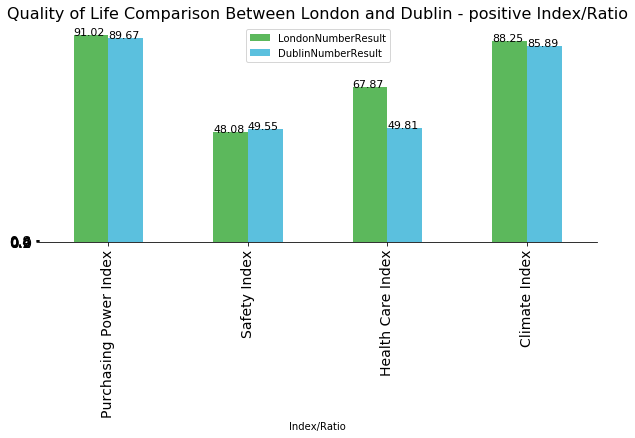

In [4]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


#chart
ax = positive_life_quality_df.plot(kind='bar'
                               , alpha=1
                               , figsize=(10, 4)
                               , lw=0.8
                               , color=['#5cb85c','#5bc0de' ]
                               , fontsize = 14
                               )

ax.set_title('Quality of Life Comparison Between London and Dublin - positive Index/Ratio', fontsize=16)#title
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='black')
    
#remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

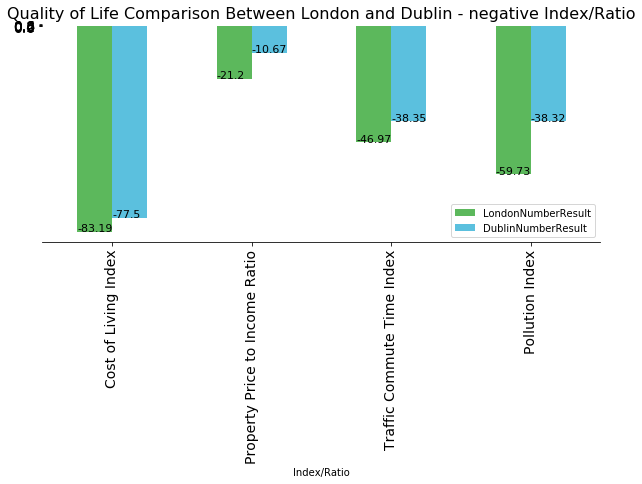

In [5]:
#chart
ax = negative_life_quality_df.plot(kind='bar'
                               , alpha=1
                               , figsize=(10, 4)
                               , lw=0.8
                               , color=['#5cb85c','#5bc0de' ]
                               , fontsize = 14
                               )

ax.set_title('Quality of Life Comparison Between London and Dublin - negative Index/Ratio', fontsize=16)#title
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='black')
    
#remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

overall Quality of Life Index (report A.3.)

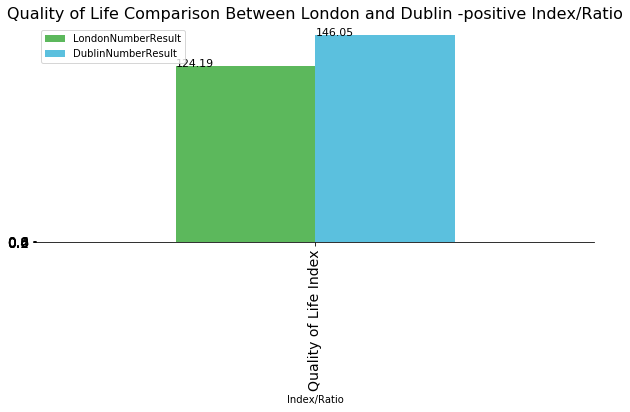

In [6]:
#chart
ax = overall_life_quality_df.plot(kind='bar'
                               , alpha=1
                               , figsize=(10, 4)
                               , lw=0.8
                               , color=['#5cb85c','#5bc0de' ]
                               , fontsize = 14
                               )

ax.set_title('Quality of Life Comparison Between London and Dublin -positive Index/Ratio', fontsize=16)#title
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='black')
    
#remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

London data about boroughs and neighbourhoods part (report B.1.)

London data about boroughs and neighbourhoods gathering

In [7]:
#import data from wikipedia link 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wikipath = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
dfs= pd.read_html(wikipath, index_col=None,  attrs={"class":"wikitable"}, encoding='utf-8-sig')
london_geolocation_df = dfs[0]

#delete unnecessary columns
london_geolocation_df.drop(1, axis=1, inplace=True)
london_geolocation_df.drop(2, axis=1, inplace=True)
london_geolocation_df.drop(3, axis=1, inplace=True)
london_geolocation_df.drop(4, axis=1, inplace=True)
london_geolocation_df.drop(5, axis=1, inplace=True)
london_geolocation_df.drop(9, axis=1, inplace=True)

#changing column headers
london_geolocation_df.rename(columns = {0:'Borough',6:'Area (sq mi)',7:'Population (2013 est)',8:'Coordinates'}, inplace=True) #assuming the sequence of columns in wikipedia doesn't change

#deleting unnecessary rows
london_geolocation_df=london_geolocation_df[london_geolocation_df.Borough != 'Borough']


In [8]:
#separating the latitude and longitude
london_lat_lon_df= london_geolocation_df.Coordinates.str.split(expand=True,)

#delete unnecessary columns
london_lat_lon_df.drop(0, axis=1, inplace=True)
london_lat_lon_df.drop(1, axis=1, inplace=True)
london_lat_lon_df.drop(2, axis=1, inplace=True)

#delete unnecessary signs
london_lat_lon_df[3] = london_lat_lon_df[3].map(lambda x: x.rstrip('°N'))

#changing column headers
london_lat_lon_df.rename(columns = {3:'Latitude',4:'Longitude'}, inplace=True)

#fixing longitude
london_lon_df= london_lat_lon_df.Longitude.str.split(pat = '°',expand=True,)

#changing the minus sign to be in front of longitude
for index,row in enumerate(london_lon_df.iterrows()):
    if london_lon_df[1].values[index]=='W':
        london_lon_df[0].values[index]='-' + london_lon_df[0].values[index]

#delete unnecesary column
london_lon_df.drop(1, axis=1, inplace=True)

#changing column header
london_lon_df.rename(columns = {0:'Longitude'}, inplace=True)

#delete unnecessary columns from london_lat_lon_df to create london_lat_df
london_lat_df = london_lat_lon_df['Latitude']

#merging the latitude and longitude into the full dataframe
london_geolocation_df['Latitude']=london_lat_df
london_geolocation_df['Longitude']=london_lon_df

#delete unnecesary column
london_geolocation_df.drop('Coordinates', axis=1, inplace=True)

#convert the Area to KM2
london_geolocation_df['Area (sq mi)']=london_geolocation_df['Area (sq mi)'].astype(float)
london_geolocation_df['Area (sq mi)']=london_geolocation_df['Area (sq mi)']*(2.58998811)

#change column headings to match with the London ones
london_geolocation_df.rename(columns = {'Area (sq mi)':'Area_KM2'}, inplace=True)

#reseting index so as the dataframe is easy to work with going forward
london_geolocation_df=london_geolocation_df.reset_index(drop=True)

#when importing hte data from wikipedia the encoding added '\ufeff' string (not visible untill using the values) in front of Latitude column, so it needs to be removed for further use
london_geolocation_df['Latitude'] = london_geolocation_df['Latitude'].map(lambda x: x.lstrip('\ufeff'))

london_geolocation_df


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=err

,Borough,Area_KM2,Population (2013 est),Latitude,Longitude
0,Barking and Dagenham [note 1],36.078534,194352,51.5607,0.1557
1,Barnet,86.738702,369088,51.6252,-0.1517
2,Bexley,60.553922,236687,51.4549,0.1505
3,Brent,43.252801,317264,51.5588,-0.2817
4,Bromley,150.141611,317899,51.4039,0.0198
5,Camden,21.755900,229719,51.5290,-0.1255
6,Croydon,86.531503,372752,51.3714,-0.0977
7,Ealing,55.529345,342494,51.5130,-0.3089
8,Enfield,82.206223,320524,51.6538,-0.0799
9,Greenwich [note 2],47.344983,264008,51.4892,0.0648


Dublin data about boroughs and neighbourhoods part (report B.2.)

Dublin data about boroughs and neighbourhoods gathering part

In [9]:
#download data from website
!wget -q -O 'dublin_geolocation_data.csv' https://data.smartdublin.ie/dataset/d80dbc39-7999-4715-a56f-f2ae9c3f5b25/resource/b5d71c3f-3c8c-491c-b3a8-a3d94c42980a/download/fccelectoraldivisionsp20110901-1705.csv
print('Data downloaded!')

Data downloaded!


In [10]:
#paste data from CSV to a dataframe
dublin_geolocation_df = pd.read_csv('dublin_geolocation_data.csv')
dublin_geolocation_df.head()

,OSI_Code,CSO_Code,Name,Lat,Long,Area_KM2
0,267001,40001,AIRPORT,53.42,-6.25,8.66
1,267002,40002,BALBRIGGAN RURAL,53.59,-6.19,25.67
2,267003,40003,BALBRIGGAN URBAN,53.60,-6.18,2.20
3,267004,40004,BALDOYLE,53.40,-6.14,2.68
4,267005,40005,BALGRIFFIN,53.42,-6.19,10.37


In [11]:
#change column headings to match with the London ones
dublin_geolocation_df.rename(columns = {'Lat':'Latitude','Long':'Longitude'}, inplace=True)

#delete unnecesary columns
dublin_geolocation_df.drop('OSI_Code', axis=1, inplace=True)
dublin_geolocation_df.drop('CSO_Code', axis=1, inplace=True)

dublin_geolocation_df.head()

,Name,Latitude,Longitude,Area_KM2
0,AIRPORT,53.42,-6.25,8.66
1,BALBRIGGAN RURAL,53.59,-6.19,25.67
2,BALBRIGGAN URBAN,53.60,-6.18,2.20
3,BALDOYLE,53.40,-6.14,2.68
4,BALGRIFFIN,53.42,-6.19,10.37


Foursquare data - generic (report C.)

In [12]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Libraries imported.')

Libraries imported.


In [13]:
#Defining Foursquare Credentials and Version
CLIENT_ID = 'FM3CSJDFJGXD1A3TYSRPBMED10MMIMBQBDLHWOLUZWGGMQTW' # your Foursquare ID
CLIENT_SECRET = 'PZUCJLDLZZLRFJRYGLHQGXINWZS03L1L42HKNWEOKVN1Z34O' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: FM3CSJDFJGXD1A3TYSRPBMED10MMIMBQBDLHWOLUZWGGMQTW
CLIENT_SECRET:PZUCJLDLZZLRFJRYGLHQGXINWZS03L1L42HKNWEOKVN1Z34O


Dublin Foursquare data analysis - starting with restaurants

In [14]:
#set radius and search query
radius = 1000
search_query = 'Restaurant'

#defining a URL list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
url=['a' for i in range(a)]

#get url's for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    url[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dublin_geolocation_df['Latitude'][index],dublin_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
results=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    results[index] = requests.get(url[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
venues=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues[index] = results[index]['response']['venues']
    
# tranform venues into a dataframe
a=len(dublin_geolocation_df['Latitude'])
venues_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues_df[index] = json_normalize(venues[index])
    
#add a column for number of restaurants to dublin_geolocation_df
dublin_geolocation_df = dublin_geolocation_df.reindex( columns = dublin_geolocation_df.columns.tolist() + ['Nr of restaurants'])

for index,row in enumerate(dublin_geolocation_df.iterrows()):
    if not venues_df[index].empty:
        dublin_geolocation_df['Nr of restaurants'][index]=(len(venues_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Dublin Foursquare data analysis - bars

In [15]:
#set radius and search query
radius = 1000
search_query = 'Bar'

#defining a URL list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
url=['a' for i in range(a)]

#get url's for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    url[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dublin_geolocation_df['Latitude'][index],dublin_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
results=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    results[index] = requests.get(url[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
venues=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues[index] = results[index]['response']['venues']

# tranform venues into a dataframe
a=len(dublin_geolocation_df['Latitude'])
venues_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues_df[index] = json_normalize(venues[index])

#add a column for number of bars to dublin_geolocation_df
dublin_geolocation_df = dublin_geolocation_df.reindex( columns = dublin_geolocation_df.columns.tolist() + ['Nr of bars'])
    
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    if not venues_df[index].empty:
        dublin_geolocation_df['Nr of bars'][index]=(len(venues_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Dublin Foursquare data analysis - theatres

In [16]:
#set radius and search query
radius = 1000
search_query = 'Theatre'

#defining a URL list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
url=['a' for i in range(a)]

#get url's for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    url[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dublin_geolocation_df['Latitude'][index],dublin_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
results=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    results[index] = requests.get(url[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
venues=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues[index] = results[index]['response']['venues']

# tranform venues into a dataframe
a=len(dublin_geolocation_df['Latitude'])
venues_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues_df[index] = json_normalize(venues[index])

#add a column for number of bars to dublin_geolocation_df
dublin_geolocation_df = dublin_geolocation_df.reindex( columns = dublin_geolocation_df.columns.tolist() + ['Nr of theatres'])
    
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    if not venues_df[index].empty:
        dublin_geolocation_df['Nr of theatres'][index]=(len(venues_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Dublin Foursquare data analysis - clubs

In [17]:
#set radius and search query
radius = 1000
search_query = 'Club'

#defining a URL list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
url=['a' for i in range(a)]

#get url's for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    url[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dublin_geolocation_df['Latitude'][index],dublin_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
results=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    results[index] = requests.get(url[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
venues=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues[index] = results[index]['response']['venues']

# tranform venues into a dataframe
a=len(dublin_geolocation_df['Latitude'])
venues_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues_df[index] = json_normalize(venues[index])

#add a column for number of bars to dublin_geolocation_df
dublin_geolocation_df = dublin_geolocation_df.reindex( columns = dublin_geolocation_df.columns.tolist() + ['Nr of clubs'])
    
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    if not venues_df[index].empty:
        dublin_geolocation_df['Nr of clubs'][index]=(len(venues_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Dublin Foursquare data analysis - sport

In [18]:
#set radius and search query
radius = 1000
search_query = 'Sport'

#defining a URL list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
url=['a' for i in range(a)]

#get url's for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    url[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dublin_geolocation_df['Latitude'][index],dublin_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
results=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    results[index] = requests.get(url[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(dublin_geolocation_df['Latitude'])
venues=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues[index] = results[index]['response']['venues']

# tranform venues into a dataframe
a=len(dublin_geolocation_df['Latitude'])
venues_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    venues_df[index] = json_normalize(venues[index])

#add a column for number of bars to dublin_geolocation_df
dublin_geolocation_df = dublin_geolocation_df.reindex( columns = dublin_geolocation_df.columns.tolist() + ['Nr of sport'])
    
for index,row in enumerate(dublin_geolocation_df.iterrows()):
    if not venues_df[index].empty:
        dublin_geolocation_df['Nr of sport'][index]=(len(venues_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
#add a column with a sum of venues
dublin_geolocation_df['Sum of venues']=dublin_geolocation_df.iloc[:,4:9].sum(axis=1, numeric_only=True)

In [20]:
#show the areas with most venues
dublin_geolocation_df.sort_values('Sum of venues',ascending=False).head(5)

,Name,Latitude,Longitude,Area_KM2,Nr of restaurants,Nr of bars,Nr of theatres,Nr of clubs,Nr of sport,Sum of venues
39,SWORDS VILLAGE,53.460,-6.22,0.92,5.0,23.0,NaN,6.0,6.0,40.0
9,BLANCHARDSTOWN-COOLMINE,53.390,-6.40,2.75,1.0,19.0,1.0,1.0,7.0,29.0
0,AIRPORT,53.420,-6.25,8.66,2.0,20.0,NaN,1.0,3.0,26.0
13,BLANCHARDSTOWN-ROSELAWN,53.385,-6.38,0.47,2.0,14.0,1.0,1.0,5.0,23.0
41,TURNAPIN,53.400,-6.24,0.94,6.0,7.0,NaN,3.0,7.0,23.0


London Foursquare data analysis - starting with restaurants

In [21]:
#set radius and search query
radius = 1000
search_query = 'Restaurant'

#defining a URL list to be used in later loops
a=len(london_geolocation_df['Latitude'])
url_london=['a' for i in range(a)]

#get url's for all London areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    url_london[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, london_geolocation_df['Latitude'][index],london_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(london_geolocation_df['Latitude'])
results_london=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    results_london[index] = requests.get(url_london[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(london_geolocation_df['Latitude'])
venues_london=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london[index] = results_london[index]['response']['venues']

# tranform venues into a dataframe
a=len(london_geolocation_df['Latitude'])
venues_london_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london_df[index] = json_normalize(venues_london[index])

#add a column for number of restaurants to london_geolocation_df
london_geolocation_df = london_geolocation_df.reindex( columns = london_geolocation_df.columns.tolist() + ['Nr of restaurants'])
    
for index,row in enumerate(london_geolocation_df.iterrows()):
    if not venues_london_df[index].empty:
        london_geolocation_df['Nr of restaurants'][index]=(len(venues_london_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


London Foursquare data analysis - bars

In [22]:
#set radius and search query
radius = 1000
search_query = 'Bar'

#defining a URL list to be used in later loops
a=len(london_geolocation_df['Latitude'])
url_london=['a' for i in range(a)]

#get url's for all London areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    url_london[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, london_geolocation_df['Latitude'][index],london_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(london_geolocation_df['Latitude'])
results_london=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    results_london[index] = requests.get(url_london[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(london_geolocation_df['Latitude'])
venues_london=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london[index] = results_london[index]['response']['venues']

# tranform venues into a dataframe
a=len(london_geolocation_df['Latitude'])
venues_london_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london_df[index] = json_normalize(venues_london[index])

#add a column for number of restaurants to london_geolocation_df
london_geolocation_df = london_geolocation_df.reindex( columns = london_geolocation_df.columns.tolist() + ['Nr of bars'])
    
for index,row in enumerate(london_geolocation_df.iterrows()):
    if not venues_london_df[index].empty:
        london_geolocation_df['Nr of bars'][index]=(len(venues_london_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


London Foursquare data analysis - theatres

In [23]:
#set radius and search query
radius = 1000
search_query = 'Theatre'

#defining a URL list to be used in later loops
a=len(london_geolocation_df['Latitude'])
url_london=['a' for i in range(a)]

#get url's for all London areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    url_london[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, london_geolocation_df['Latitude'][index],london_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(london_geolocation_df['Latitude'])
results_london=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    results_london[index] = requests.get(url_london[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(london_geolocation_df['Latitude'])
venues_london=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london[index] = results_london[index]['response']['venues']

# tranform venues into a dataframe
a=len(london_geolocation_df['Latitude'])
venues_london_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london_df[index] = json_normalize(venues_london[index])

#add a column for number of restaurants to london_geolocation_df
london_geolocation_df = london_geolocation_df.reindex( columns = london_geolocation_df.columns.tolist() + ['Nr of theatres'])
    
for index,row in enumerate(london_geolocation_df.iterrows()):
    if not venues_london_df[index].empty:
        london_geolocation_df['Nr of theatres'][index]=(len(venues_london_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
London Foursquare data analysis - clubs

In [24]:
#set radius and search query
radius = 1000
search_query = 'Club'

#defining a URL list to be used in later loops
a=len(london_geolocation_df['Latitude'])
url_london=['a' for i in range(a)]

#get url's for all London areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    url_london[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, london_geolocation_df['Latitude'][index],london_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(london_geolocation_df['Latitude'])
results_london=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    results_london[index] = requests.get(url_london[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(london_geolocation_df['Latitude'])
venues_london=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london[index] = results_london[index]['response']['venues']

# tranform venues into a dataframe
a=len(london_geolocation_df['Latitude'])
venues_london_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london_df[index] = json_normalize(venues_london[index])

#add a column for number of restaurants to london_geolocation_df
london_geolocation_df = london_geolocation_df.reindex( columns = london_geolocation_df.columns.tolist() + ['Nr of clubs'])
    
for index,row in enumerate(london_geolocation_df.iterrows()):
    if not venues_london_df[index].empty:
        london_geolocation_df['Nr of clubs'][index]=(len(venues_london_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


London Foursquare data analysis - sport

In [25]:
#set radius and search query
radius = 1000
search_query = 'Sport'

#defining a URL list to be used in later loops
a=len(london_geolocation_df['Latitude'])
url_london=['a' for i in range(a)]

#get url's for all London areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    url_london[index] = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, london_geolocation_df['Latitude'][index],london_geolocation_df['Longitude'][index], VERSION, search_query, radius, LIMIT)

#defining a results list to be used in later loops
a=len(london_geolocation_df['Latitude'])
results_london=['a' for i in range(a)]

#Send the GET Reques for all Dublin areas
for index,row in enumerate(london_geolocation_df.iterrows()):
    results_london[index] = requests.get(url_london[index]).json()
    
#Get relevant parts of JSON and transform those into pandas dataframes
#defining a venues list to be used in later loops
a=len(london_geolocation_df['Latitude'])
venues_london=['a' for i in range(a)]

# assign relevant part of JSON to venues
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london[index] = results_london[index]['response']['venues']

# tranform venues into a dataframe
a=len(london_geolocation_df['Latitude'])
venues_london_df=['a' for i in range(a)]

# tranform venues into a dataframe
for index,row in enumerate(london_geolocation_df.iterrows()):
    venues_london_df[index] = json_normalize(venues_london[index])

#add a column for number of restaurants to london_geolocation_df
london_geolocation_df = london_geolocation_df.reindex( columns = london_geolocation_df.columns.tolist() + ['Nr of sport'])
    
for index,row in enumerate(london_geolocation_df.iterrows()):
    if not venues_london_df[index].empty:
        london_geolocation_df['Nr of sport'][index]=(len(venues_london_df[index].index))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
#add a column with a sum of venues
london_geolocation_df['Sum of venues']=london_geolocation_df.iloc[:,4:9].sum(axis=1, numeric_only=True)

In [27]:
#show the areas with most venues
london_geolocation_df.sort_values('Sum of venues',ascending=False).head(5)

,Borough,Area_KM2,Population (2013 est),Latitude,Longitude,Nr of restaurants,Nr of bars,Nr of theatres,Nr of clubs,Nr of sport,Sum of venues
5,Camden,21.755900,229719,51.5290,-0.1255,30.0,30.0,30.0,30.0,21.0,120.0
26,Southwark,28.852468,298464,51.5035,-0.0804,30.0,30.0,21.0,30.0,13.0,111.0
31,Westminster,21.471001,226841,51.4973,-0.1372,30.0,30.0,13.0,30.0,13.0,103.0
18,Kensington and Chelsea,12.121144,155594,51.5020,-0.1947,30.0,30.0,10.0,30.0,10.0,100.0
11,Hammersmith and Fulham [note 4],16.394625,178685,51.4927,-0.2339,25.0,30.0,6.0,28.0,7.0,89.0


Calculate the ratio of Sum of venues per KM2

In [28]:
#adding a new column to london_geolocation_df and filling it with the ratio
london_geolocation_df['Sum of venues per KM2']=london_geolocation_df['Sum of venues']/london_geolocation_df['Area_KM2']

#adding a new column to dublin_geolocation_df and filling it with the ratio
dublin_geolocation_df['Sum of venues per KM2']=dublin_geolocation_df['Sum of venues']/dublin_geolocation_df['Area_KM2']

In [29]:
#show the two areas with most venues
london_geolocation_df.sort_values('Sum of venues per KM2',ascending=False).head(5)

,Borough,Area_KM2,Population (2013 est),Latitude,Longitude,Nr of restaurants,Nr of bars,Nr of theatres,Nr of clubs,Nr of sport,Sum of venues,Sum of venues per KM2
18,Kensington and Chelsea,12.121144,155594,51.5020,-0.1947,30.0,30.0,10.0,30.0,10.0,100.0,8.250046
17,Islington,14.866532,215667,51.5416,-0.1022,30.0,30.0,7.0,16.0,2.0,83.0,5.583010
5,Camden,21.755900,229719,51.5290,-0.1255,30.0,30.0,30.0,30.0,21.0,120.0,5.515745
11,Hammersmith and Fulham [note 4],16.394625,178685,51.4927,-0.2339,25.0,30.0,6.0,28.0,7.0,89.0,5.428609
31,Westminster,21.471001,226841,51.4973,-0.1372,30.0,30.0,13.0,30.0,13.0,103.0,4.797168


In [30]:
#show the two areas with most venues
dublin_geolocation_df.sort_values('Sum of venues per KM2',ascending=False).head(5)

,Name,Latitude,Longitude,Area_KM2,Nr of restaurants,Nr of bars,Nr of theatres,Nr of clubs,Nr of sport,Sum of venues,Sum of venues per KM2
13,BLANCHARDSTOWN-ROSELAWN,53.385,-6.38,0.47,2.0,14.0,1.0,1.0,5.0,23.0,48.936170
39,SWORDS VILLAGE,53.460,-6.22,0.92,5.0,23.0,NaN,6.0,6.0,40.0,43.478261
41,TURNAPIN,53.400,-6.24,0.94,6.0,7.0,NaN,3.0,7.0,23.0,24.468085
11,BLANCHARDSTOWN-DELWOOD,53.380,-6.39,1.01,1.0,10.0,NaN,NaN,1.0,12.0,11.881188
9,BLANCHARDSTOWN-COOLMINE,53.390,-6.40,2.75,1.0,19.0,1.0,1.0,7.0,29.0,10.545455
